<a href="https://colab.research.google.com/github/Ananya-S-Krishna/tool-wear-prediction-cnc-machine/blob/main/Tool_Wear_Prediction_in_CNC_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)
with open("kaggle.json", "rb") as src, open("/root/.kaggle/kaggle.json", "wb") as dst:
    dst.write(src.read())
os.chmod("/root/.kaggle/kaggle.json", 0o600)

In [ ]:
# Install wget
!apt-get install -qq wget

# Download UniWear dataset from GitHub
!wget https://raw.githubusercontent.com/katulu-io/uniwear-dataset/main/data/phm2010_bundle_high_resolution.csv

# Load dataset with pandas
import pandas as pd
df = pd.read_csv('phm2010_bundle_high_resolution.csv')

# Quick view
df.head(), df.shape

--2025-07-13 16:05:49--  https://raw.githubusercontent.com/katulu-io/uniwear-dataset/main/data/phm2010_bundle_high_resolution.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12591992 (12M) [text/plain]
Saving to: ‘phm2010_bundle_high_resolution.csv’

phm2010_bundle_high 100%[===================>]  12.01M  26.1MB/s    in 0.5s    

2025-07-13 16:05:51 (26.1 MB/s) - ‘phm2010_bundle_high_resolution.csv’ saved [12591992/12591992]



(   Unnamed: 0  force_x  force_y  force_z  vibration_x  vibration_y  \
 0           0    0.704   -0.387   -1.084        0.018        0.031   
 1           1   -0.205   -0.727    0.835       -0.083       -0.079   
 2           2    0.528    1.935   -0.622       -0.003        0.032   
 3           3    0.759    2.080    1.077       -0.058       -0.088   
 4           4    1.139    0.939    0.949       -0.045       -0.097   
 
    vibration_z  acoustic_emission_rms  timestamp  tool_wear experiment_tag  \
 0        0.027                 -0.004    0.00002   0.048893             c1   
 1       -0.083                  0.001    0.04002   0.048893             c1   
 2        0.012                 -0.000    0.08002   0.048893             c1   
 3       -0.072                 -0.003    0.12002   0.048893             c1   
 4       -0.063                  0.001    0.16002   0.048893             c1   
 
   dataset_tag  
 0     phm2010  
 1     phm2010  
 2     phm2010  
 3     phm2010  
 4     phm2

In [ ]:
# Clean column names
df.columns = df.columns.str.lower().str.strip()

# Drop 'unnamed: 0' if present (index column from CSV)
if 'unnamed: 0' in df.columns:
    df.drop(columns=['unnamed: 0'], inplace=True)

# Show basic info
df.info()

# Show summary statistics
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104675 entries, 0 to 104674
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   force_x                104675 non-null  float64
 1   force_y                104675 non-null  float64
 2   force_z                104675 non-null  float64
 3   vibration_x            104675 non-null  float64
 4   vibration_y            104675 non-null  float64
 5   vibration_z            104675 non-null  float64
 6   acoustic_emission_rms  104675 non-null  float64
 7   timestamp              104675 non-null  float64
 8   tool_wear              104675 non-null  float64
 9   experiment_tag         104675 non-null  object 
 10  dataset_tag            104675 non-null  object 
dtypes: float64(9), object(2)
memory usage: 8.8+ MB


,count,mean,std,min,25%,50%,75%,max
force_x,104675.0,12.664371,27.396559,-76.396000,0.431000,6.678000,19.60200,170.700000
force_y,104675.0,5.941712,10.447350,-93.728000,-0.071500,4.672000,10.91750,94.225000
force_z,104675.0,6.639266,18.605982,-40.532000,-5.058000,1.798000,15.56150,82.500000
vibration_x,104675.0,0.000718,0.163953,-1.679000,-0.081000,0.001000,0.08200,1.504000
vibration_y,104675.0,-0.001972,0.200290,-2.203000,-0.090000,0.000000,0.08800,2.033000
vibration_z,104675.0,-0.002971,0.209016,-2.810000,-0.099000,-0.002000,0.09300,2.190000
acoustic_emission_rms,104675.0,0.116139,0.043391,-0.005000,0.093000,0.107000,0.12700,0.560000
timestamp,104675.0,691.564211,399.337774,0.000020,345.761590,691.523180,1037.28473,1398.566300
tool_wear,104675.0,0.120099,0.040982,0.031416,0.094569,0.109525,0.13787,0.234716


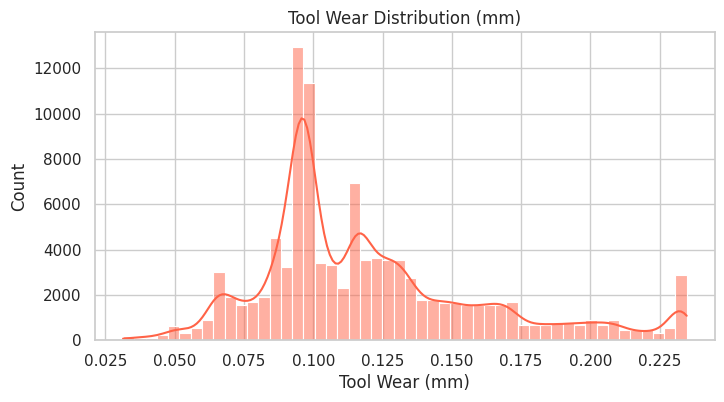

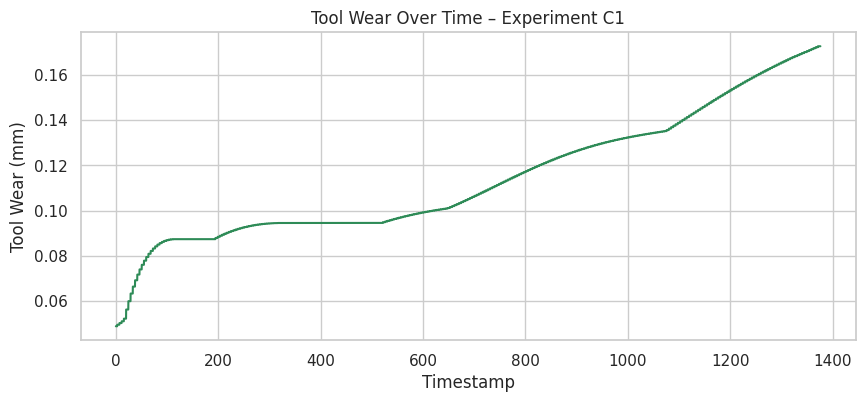

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# 1. Tool wear distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['tool_wear'], bins=50, kde=True, color='tomato')
plt.title('Tool Wear Distribution (mm)')
plt.xlabel('Tool Wear (mm)')
plt.ylabel('Count')
plt.show()

# 2. Tool wear trend over time for one experiment
sample_tool = df[df['experiment_tag'] == 'c1']

plt.figure(figsize=(10, 4))
sns.lineplot(x='timestamp', y='tool_wear', data=sample_tool, color='seagreen')
plt.title('Tool Wear Over Time – Experiment C1')
plt.xlabel('Timestamp')
plt.ylabel('Tool Wear (mm)')
plt.show()

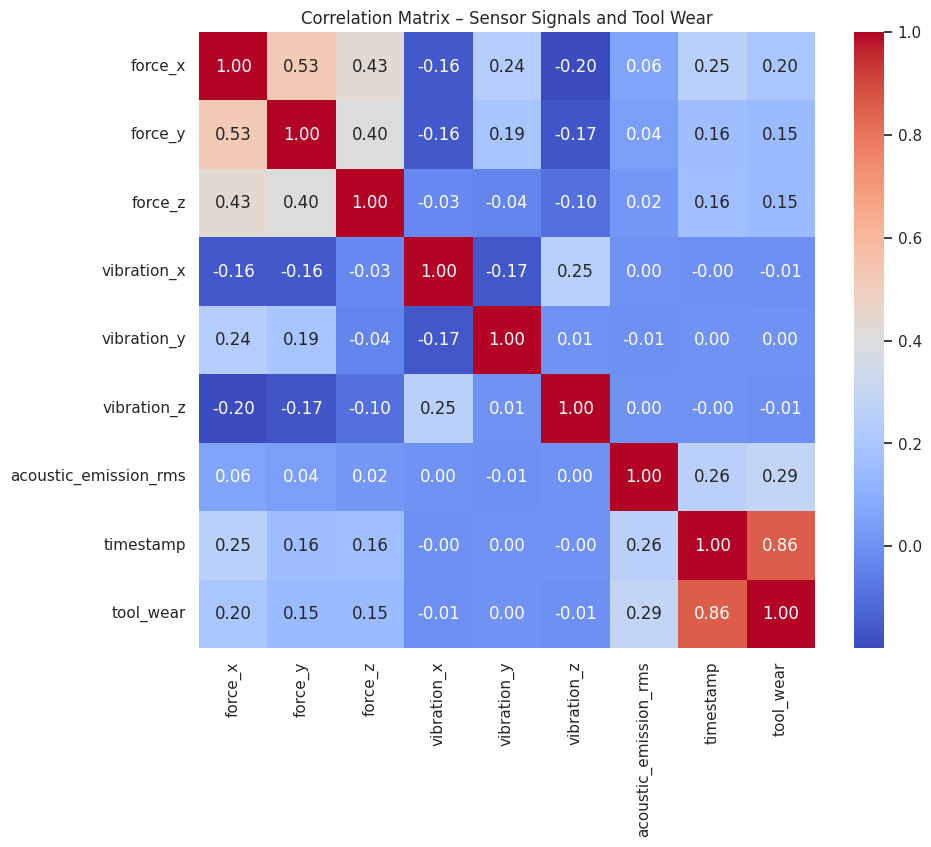

In [ ]:
# Drop non-numeric columns before correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix – Sensor Signals and Tool Wear')
plt.show()

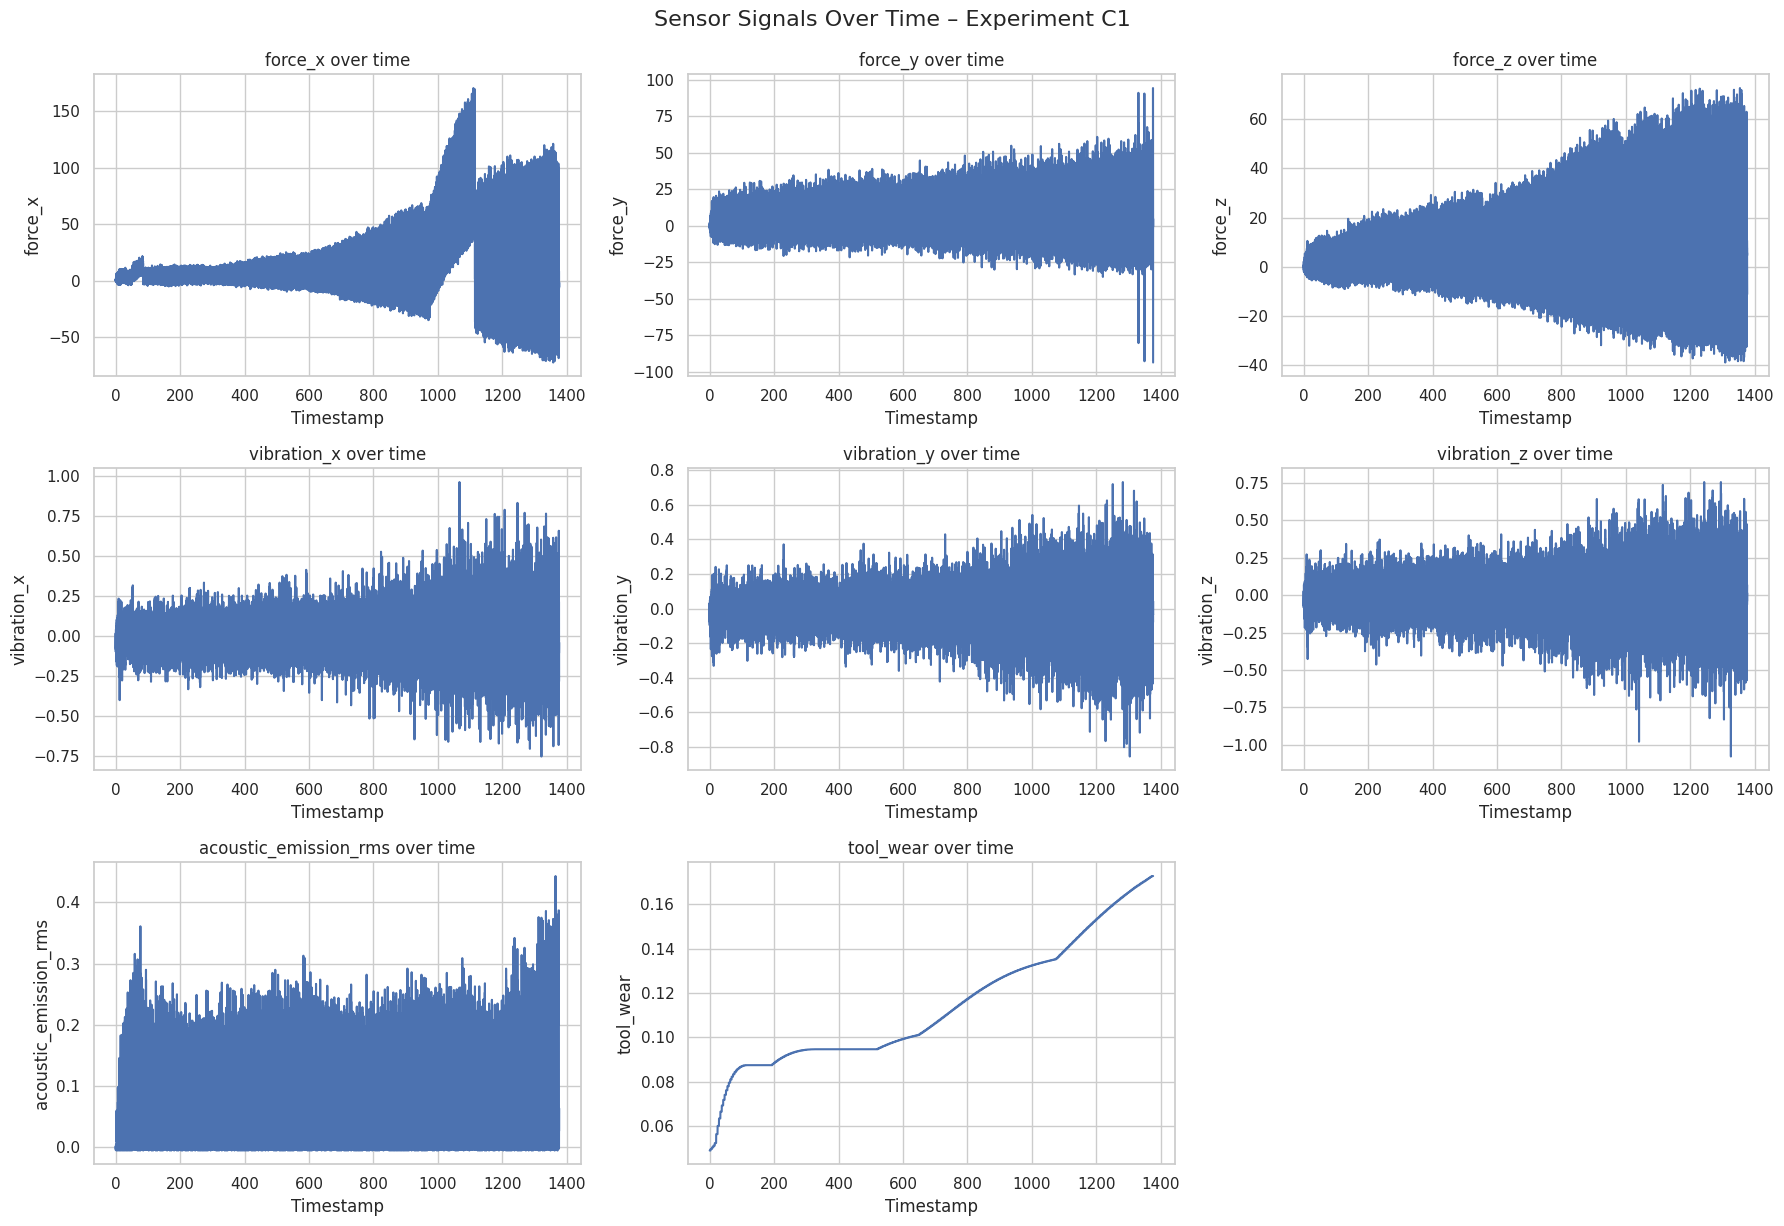

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for experiment 'c1'
df_c1 = df[df['experiment_tag'] == 'c1']

# List of sensor columns to plot
sensor_columns = [
    'force_x', 'force_y', 'force_z',
    'vibration_x', 'vibration_y', 'vibration_z',
    'acoustic_emission_rms', 'tool_wear'
]

# Set up grid: 3 rows x 3 cols
plt.figure(figsize=(18, 12))
for i, col in enumerate(sensor_columns):
    plt.subplot(3, 3, i+1)
    sns.lineplot(data=df_c1, x='timestamp', y=col)
    plt.title(f'{col} over time')
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Sensor Signals Over Time – Experiment C1', fontsize=16, y=1.02)
plt.show()

In [ ]:
# Drop non-numeric or leakage-prone columns
df_cleaned = df.drop(columns=['timestamp', 'experiment_tag', 'dataset_tag'])

# Preview cleaned data
df_cleaned.head()

,force_x,force_y,force_z,vibration_x,vibration_y,vibration_z,acoustic_emission_rms,tool_wear
0,0.704,-0.387,-1.084,0.018,0.031,0.027,-0.004,0.048893
1,-0.205,-0.727,0.835,-0.083,-0.079,-0.083,0.001,0.048893
2,0.528,1.935,-0.622,-0.003,0.032,0.012,-0.000,0.048893
3,0.759,2.080,1.077,-0.058,-0.088,-0.072,-0.003,0.048893
4,1.139,0.939,0.949,-0.045,-0.097,-0.063,0.001,0.048893


In [ ]:
# Separate features and target
X = df_cleaned.drop(columns=['tool_wear'])
y = df_cleaned['tool_wear']

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (104675, 7)
Target shape: (104675,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional but helps with readability)
import pandas as pd
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Preview scaled features
X_scaled.head()

,force_x,force_y,force_z,vibration_x,vibration_y,vibration_z,acoustic_emission_rms
0,-0.436567,-0.605775,-0.415098,0.105410,0.164623,0.143392,-2.768737
1,-0.469746,-0.638319,-0.311958,-0.510621,-0.384583,-0.382887,-2.653507
2,-0.442991,-0.383517,-0.390267,-0.022675,0.169616,0.071626,-2.676553
3,-0.434559,-0.369637,-0.298952,-0.358138,-0.429518,-0.330260,-2.745691
4,-0.420689,-0.478852,-0.305831,-0.278847,-0.474453,-0.287200,-2.653507


In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Check shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (83740, 7)
Test shape: (20935, 7)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE:  {mae_lr:.5f}")
print(f"RMSE: {rmse_lr:.5f}")
print(f"R²:   {r2_lr:.5f}")

Linear Regression Performance:
MAE:  0.02913
RMSE: 0.03802
R²:   0.12064


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MAE:  {mae_rf:.5f}")
print(f"RMSE: {rmse_rf:.5f}")
print(f"R²:   {r2_rf:.5f}")

Random Forest Performance:
MAE:  0.01435
RMSE: 0.02053
R²:   0.74364


In [ ]:
!pip install xgboost lightgbm catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [ ]:
# Import the XGBoost Regressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the model with reasonable default hyperparameters
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
xgb_preds = xgb_model.predict(X_test)

# Evaluate performance using standard metrics
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

# Print results
print("XGBoost Performance:")
print(f"MAE:  {xgb_mae:.5f}")
print(f"RMSE: {xgb_rmse:.5f}")
print(f"R²:   {xgb_r2:.5f}")

XGBoost Performance:
MAE:  0.01530
RMSE: 0.02140
R²:   0.72141


In [ ]:
# Import the LightGBM Regressor
from lightgbm import LGBMRegressor

# Initialize the model with default hyperparameters
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Fit the model
lgb_model.fit(X_train, y_train)

# Predict on test data
lgb_preds = lgb_model.predict(X_test)

# Evaluate performance
lgb_mae = mean_absolute_error(y_test, lgb_preds)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_preds))
lgb_r2 = r2_score(y_test, lgb_preds)

# Print results
print("LightGBM Performance:")
print(f"MAE:  {lgb_mae:.5f}")
print(f"RMSE: {lgb_rmse:.5f}")
print(f"R²:   {lgb_r2:.5f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 83740, number of used features: 7
[LightGBM] [Info] Start training from score 0.120258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Performance:
MAE:  0.01552
RMSE: 0.02158
R²:   0.71666


In [ ]:
# Import the CatBoost Regressor
from catboost import CatBoostRegressor

# Initialize the model (silent mode to suppress training logs)
cat_model = CatBoostRegressor(verbose=0, random_state=42)

# Fit the model
cat_model.fit(X_train, y_train)

# Predict on test data
cat_preds = cat_model.predict(X_test)

# Evaluate performance
cat_mae = mean_absolute_error(y_test, cat_preds)
cat_rmse = np.sqrt(mean_squared_error(y_test, cat_preds))
cat_r2 = r2_score(y_test, cat_preds)

# Print results
print("CatBoost Performance:")
print(f"MAE:  {cat_mae:.5f}")
print(f"RMSE: {cat_rmse:.5f}")
print(f"R²:   {cat_r2:.5f}")

CatBoost Performance:
MAE:  0.01461
RMSE: 0.02052
R²:   0.74381


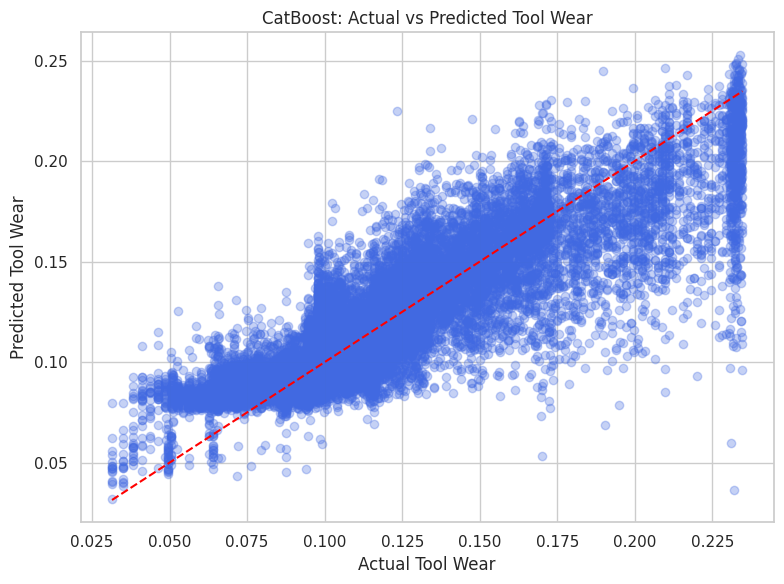

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted tool wear
plt.figure(figsize=(8, 6))
plt.scatter(y_test, cat_preds, alpha=0.3, color='royalblue')
plt.xlabel("Actual Tool Wear")
plt.ylabel("Predicted Tool Wear")
plt.title("CatBoost: Actual vs Predicted Tool Wear")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the trained CatBoost model
joblib.dump(cat_model, "catboost_tool_wear_model.pkl")

['catboost_tool_wear_model.pkl']